#### Agglomerative Hierarchical Clustering (from scratch)

https://www.linkedin.com/pulse/agglomerative-hierarchical-clustering-from-scratch-akash-pb

https://github.com/Darkprogrammerpb/DeepLearningProjects/tree/master/Project40/agglomerative_hierarchial_clustering

#### Loading necessary libraries 
We will be building the entire Agglomerative clustering (single link) from the scratch first and will import necessary libraries required to build the entire clustering scheme.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Creating the data:
We create the data necessary for clustering. We consider only 2 features but the number of features could be extended to more than 2. The example was created to make calculations simple and easy to understand

In [2]:
X = np.array([[0.40,0.53],
              [0.22,0.32],
              [0.35,0.32],
              [0.26,0.19],
              [0.08,0.41],
              [0.35,0.30],
              [0.80,0.98],
              [0.28,0.33]
])

In [3]:
X

array([[0.4 , 0.53],
       [0.22, 0.32],
       [0.35, 0.32],
       [0.26, 0.19],
       [0.08, 0.41],
       [0.35, 0.3 ],
       [0.8 , 0.98],
       [0.28, 0.33]])

#### Cluster Distance computation: 
The class below enables the formation of distance/similarity matrix between the sample elements. Some methods of the class are used to compute distance based on certain criterion because after some iteration in Hierarchial clustering, we will have to compute distances between samples and clusters and between two clusters and so on.

In [4]:
class Distance_computation_grid(object):
    '''
        class to enable the Computation of distance matrix 
    '''
    def __init__(self):
        pass
    
    def compute_distance(self,samples):
        '''
            Creates a matrix of distances between individual samples and clusters attained at a particular step
        '''
        Distance_mat = np.zeros((len(samples),len(samples)))
        for i in range(Distance_mat.shape[0]):
            for j in range(Distance_mat.shape[0]):
                if i!=j:
                    Distance_mat[i,j] = float(self.distance_calculate(samples[i],samples[j]))
                else:
                    Distance_mat[i,j] = 10**4
        return Distance_mat
    
    
    def distance_calculate(self,sample1,sample2):
        '''
            Distance calulated between two samples. The two samples can be both samples, both clusters or
            one cluster and one sample. If both of them are samples/clusters, then simple norm is used. In other 
            cases, we refer it as an exception case and pass the samples as parameter to some function that 
            calculates the necessary distance between cluster and a sample
        '''
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except:
                    dist.append(self.intersampledist(sample1[i],sample2[j]))
        return min(dist)
    
    
    def intersampledist(self,s1,s2):
        '''
            To be used in case we have one sample and one cluster . It takes the help of one 
            method 'interclusterdist' to compute the distances between elements of a cluster(which are
            samples) and the actual sample given.
        '''
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(dist)
    
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(dist)

#### Implementing the clustering method: 
We now implement the clustering method and we keep on printing the clusters formed after each iteration. This will be used to verify the clustering done from our implementation of agglomerative clustering with single linkage with other modules available

In [5]:
progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
distcal  = Distance_computation_grid()

while m>1:
    print('Sample size before clustering    :- ',m)
    Distance_mat      = distcal.compute_distance(samples)
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)
    
    print('Cluster Node 1                   :-',progression[sample_ind_needed[0]])
    print('Cluster Node 2                   :-',progression[sample_ind_needed[1]])
    
    progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    v = progression.pop(sample_ind_needed[1])
    m = len(samples)
    
    print('Progression(Current Sample)      :-',progression)
    print('Cluster attained                 :-',progression[sample_ind_needed[0]])
    print('Sample size after clustering     :-',m)
    print('\n')

Sample size before clustering    :-  8
Cluster Node 1                   :- [2]
Cluster Node 2                   :- [5]
Progression(Current Sample)      :- [[0], [1], [[2, [5]]], [3], [4], [6], [7]]
Cluster attained                 :- [[2, [5]]]
Sample size after clustering     :- 7


Sample size before clustering    :-  7
Cluster Node 1                   :- [1]
Cluster Node 2                   :- [7]
Progression(Current Sample)      :- [[0], [[1, [7]]], [[2, [5]]], [3], [4], [6]]
Cluster attained                 :- [[1, [7]]]
Sample size after clustering     :- 6


Sample size before clustering    :-  6
Cluster Node 1                   :- [[1, [7]]]
Cluster Node 2                   :- [[2, [5]]]
Progression(Current Sample)      :- [[0], [[[1, [7]], [[2, [5]]]]], [3], [4], [6]]
Cluster attained                 :- [[[1, [7]], [[2, [5]]]]]
Sample size after clustering     :- 5


Sample size before clustering    :-  5
Cluster Node 1                   :- [[[1, [7]], [[2, [5]]]]]
Cluster Nod

<ipython-input-4-0fd868e95aed>:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))


#### Final Comments on our implementation: 
We used the single linkage in our case, We can modify the existing code to implement complete linkage and ward's methods as well

#### Scipy Implementation: 
We can also create Dendrogram using the existing module available in Scipy. The entire process of clustering is done in the backend and we can clearly get a dendrogram to show how many clusters are there and how hierarchy is formed in the cluster

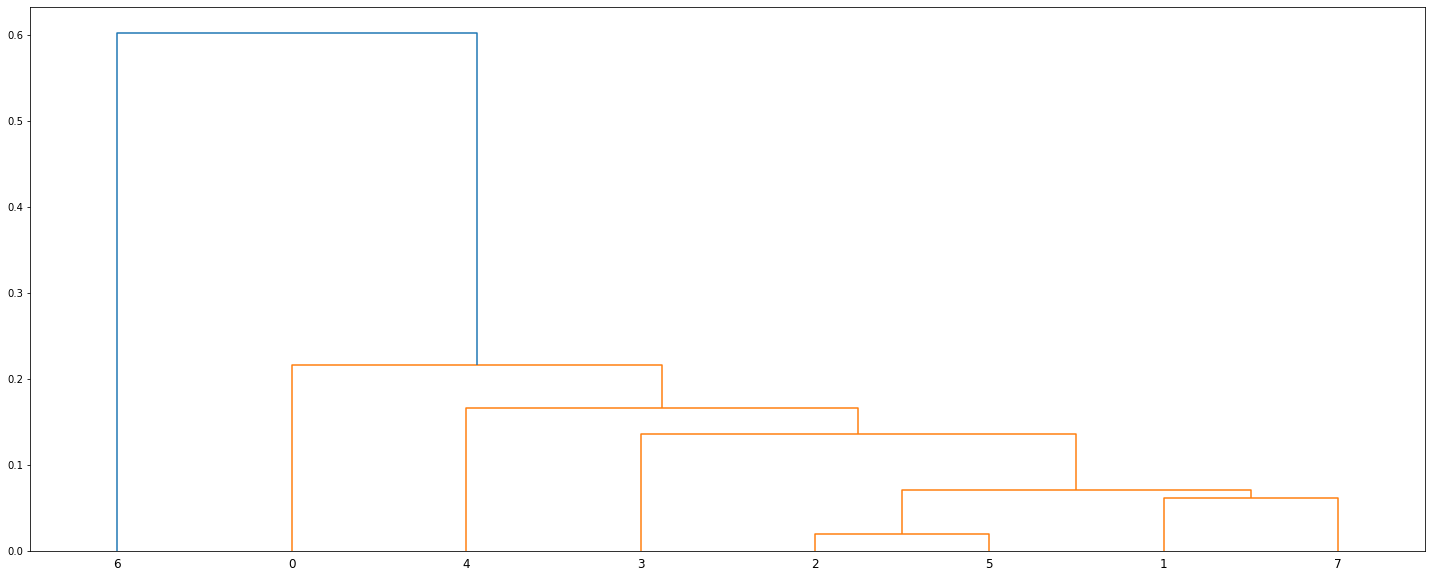

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

#### Comparison with our implementation: 
We can clearly see that our implementation give the exact same clusters as the one shown in the dendrogram.

## Sklean implementation and its outcome

In [7]:
from sklearn.cluster import AgglomerativeClustering
aggclus = AgglomerativeClustering().fit(X)
aggclus.labels_

array([0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

We are able to get final clusters in sklearn. Retreiving the entire hierarchy may be a difficult task but can be done using scipy as explained in the previous step